In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
from torch.autograd import Variable

In [24]:
data = pd.read_csv('MLP_regresion.csv')
data.keys()

Index(['X', 'Y'], dtype='object')

In [25]:
x = data['X']
y = data['Y']

In [26]:
X = Variable(torch.from_numpy(np.asarray(x))).float()
X = torch.unsqueeze(X, dim=1)

Y = Variable(torch.from_numpy(np.asarray(y))).float()
Y = torch.unsqueeze(Y, dim=1)

## Modelo 1

In [184]:
input_dim = 1
model = torch.nn.Sequential(
    torch.nn.Linear(input_dim, 70),
    torch.nn.ReLU(),
    torch.nn.Linear(70, 80),
    torch.nn.ReLU(),
    torch.nn.Linear(80, 90),
    torch.nn.ReLU(),
    torch.nn.Linear(90, 100),
    torch.nn.ReLU(),
    torch.nn.Linear(100, input_dim)
)
model

Sequential(
  (0): Linear(in_features=1, out_features=70, bias=True)
  (1): ReLU()
  (2): Linear(in_features=70, out_features=80, bias=True)
  (3): ReLU()
  (4): Linear(in_features=80, out_features=90, bias=True)
  (5): ReLU()
  (6): Linear(in_features=90, out_features=100, bias=True)
  (7): ReLU()
  (8): Linear(in_features=100, out_features=1, bias=True)
)

In [185]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
criterion = torch.nn.MSELoss()

Epoch: [1/500], loss: 0.5262263417243958


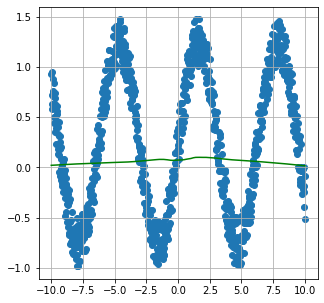

Epoch: [51/500], loss: 0.4351535141468048


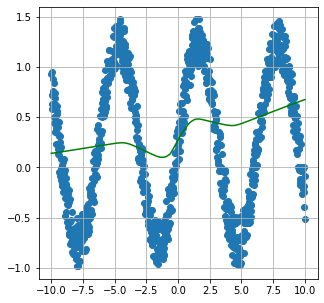

Epoch: [101/500], loss: 0.33184823393821716


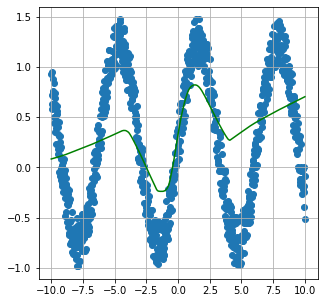

Epoch: [151/500], loss: 0.29312169551849365


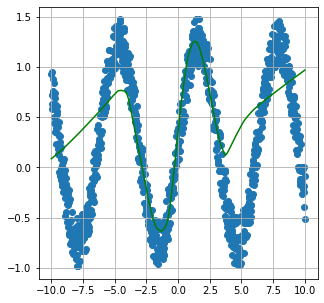

Epoch: [201/500], loss: 0.31615185737609863


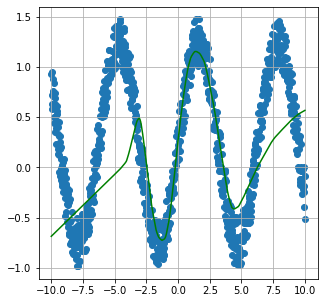

Epoch: [251/500], loss: 0.15703493356704712


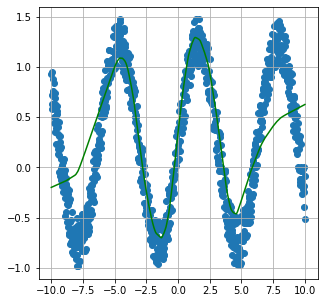

Epoch: [301/500], loss: 0.293561726808548


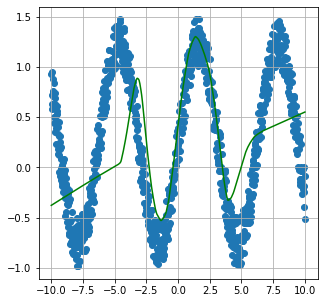

Epoch: [351/500], loss: 0.1625925451517105


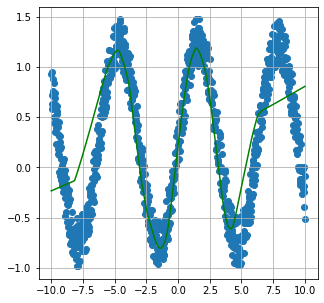

Epoch: [401/500], loss: 0.12491690367460251


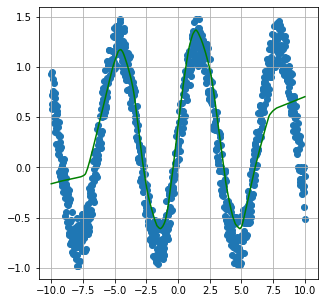

Epoch: [451/500], loss: 0.12917493283748627


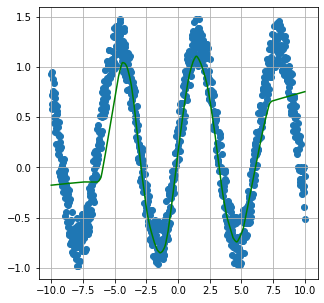

In [186]:
n_epoch = 500

loss_list = []

for epoch in range(n_epoch):    
    Y_pred = model(X)    
    loss = criterion(Y_pred, Y)    
    loss_list.append(loss.item())
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch%50 == 0):
        print('Epoch: [{}/{}], loss: {}'.format(epoch+1, n_epoch, loss.item()))
        
        fig = plt.figure(figsize=(5,5))
        plt.scatter(X.data.numpy(), Y.data.numpy())
        plt.plot(X.data.numpy(), Y_pred.data.numpy(), 'g-')
        plt.grid()
        plt.show()

En este modelo, decidí configurar cinco capas e ir asignandole a cada capa un número de neuronas de forma ascendente, iniciando con 70 en la primera capa y finalizando con un total de 100 en la quinta. El learning rate para el proceso de optimización lo fije en 0.1.

Los resultados en este caso arrojan un ajuste que se aproxima bastante a lo que uno desearía, sin embargo el error sigue siendo un poco alto si lo que se persigue es un ajuste casí ideal.

## Modelo 2

In [203]:
input_dim = 1
model = torch.nn.Sequential(
    torch.nn.Linear(input_dim, 90),
    torch.nn.ReLU(),
    torch.nn.Linear(90, 90),
    torch.nn.ReLU(),
    torch.nn.Linear(90, 90),
    torch.nn.ReLU(),
    torch.nn.Linear(90, 90),
    torch.nn.ReLU(),
    torch.nn.Linear(90, input_dim)
)
model

Sequential(
  (0): Linear(in_features=1, out_features=90, bias=True)
  (1): ReLU()
  (2): Linear(in_features=90, out_features=90, bias=True)
  (3): ReLU()
  (4): Linear(in_features=90, out_features=90, bias=True)
  (5): ReLU()
  (6): Linear(in_features=90, out_features=90, bias=True)
  (7): ReLU()
  (8): Linear(in_features=90, out_features=1, bias=True)
)

In [204]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.2)
criterion = torch.nn.MSELoss()

Epoch: [1/500], loss: 0.5437797904014587


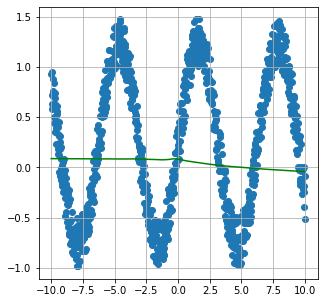

Epoch: [51/500], loss: 0.381236732006073


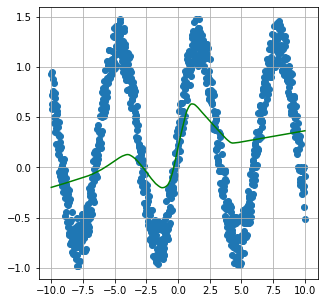

Epoch: [101/500], loss: 0.2958492338657379


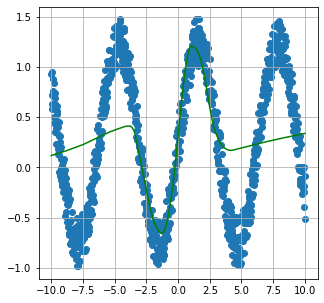

Epoch: [151/500], loss: 0.23708535730838776


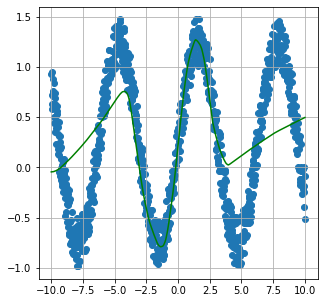

Epoch: [201/500], loss: 0.24566395580768585


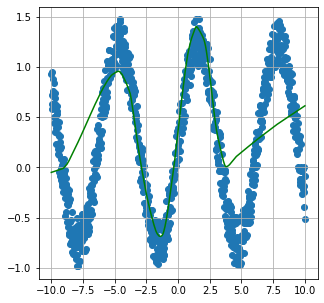

Epoch: [251/500], loss: 0.20978516340255737


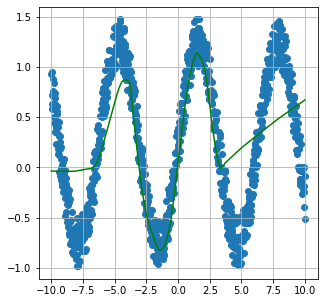

Epoch: [301/500], loss: 0.16830936074256897


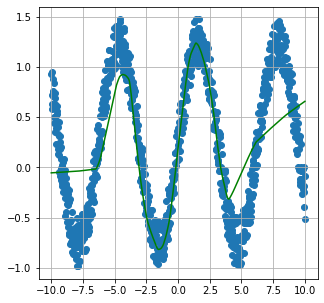

Epoch: [351/500], loss: 0.3035527169704437


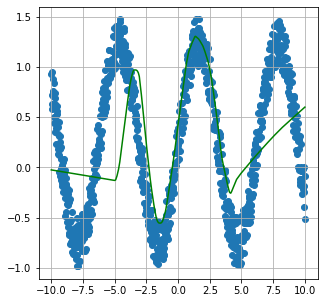

Epoch: [401/500], loss: 0.14015652239322662


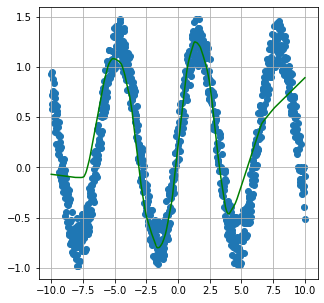

Epoch: [451/500], loss: 0.1772891730070114


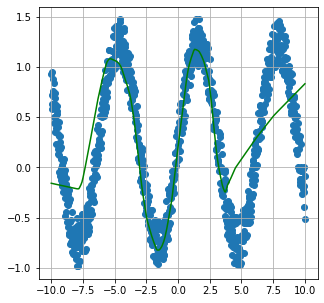

In [205]:
n_epoch = 500

loss_list = []

for epoch in range(n_epoch):    
    Y_pred = model(X)    
    loss = criterion(Y_pred, Y)    
    loss_list.append(loss.item())
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch%50 == 0):
        print('Epoch: [{}/{}], loss: {}'.format(epoch+1, n_epoch, loss.item()))
        
        fig = plt.figure(figsize=(5,5))
        plt.scatter(X.data.numpy(), Y.data.numpy())
        plt.plot(X.data.numpy(), Y_pred.data.numpy(), 'g-')
        plt.grid()
        plt.show()

En este modelo, mantuve el mismo número de capas que en el primer modelo, sin embargo en esta configuración por cada capa asigne el mismo número de neuronas (90), y modifique el learning rate a 0.2.

Los resultados en este caso arrojan un ajuste que se aproxima un poco menos a lo que uno desearía comparandolo con el modelo 1.